In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()/

# ID: 016099395 - Filter for last two digits - 9 and 5
train_mask = np.isin(train_labels, [9, 5])
test_mask = np.isin(test_labels, [9, 5])

x_train, y_train = train_images[train_mask], train_labels[train_mask]
x_test, y_test = test_images[test_mask], test_labels[test_mask]

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [31]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [21]:
history = model.fit(x_train, (y_train == 9).astype(int),
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/50
143/143 [==============================] - 2s 5ms/step - loss: 0.0836 - accuracy: 0.9745 - val_loss: 0.0484 - val_accuracy: 0.9877
Epoch 2/50
143/143 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9894 - val_loss: 0.0374 - val_accuracy: 0.9890
Epoch 3/50
143/143 [==============================] - 1s 4ms/step - loss: 0.0198 - accuracy: 0.9941 - val_loss: 0.0365 - val_accuracy: 0.9890
Epoch 4/50
143/143 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0452 - val_accuracy: 0.9864
Epoch 5/50
143/143 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9963 - val_loss: 0.0283 - val_accuracy: 0.9925
Epoch 6/50
143/143 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9981 - val_loss: 0.0279 - val_accuracy: 0.9930
Epoch 7/50
143/143 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.0314 - val_accuracy: 0.9921
Epoch 

In [22]:
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).flatten()

confusion = confusion_matrix((y_test == 9).astype(int), y_pred_binary)
print("Confusion Matrix:")
print(confusion)

print("\nClassification Report:")
print(classification_report((y_test == 9).astype(int), y_pred_binary))

60/60 [==============================] - 0s 3ms/step
Confusion Matrix:
[[ 889    3]
 [   6 1003]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       1.00      0.99      1.00      1009

    accuracy                           1.00      1901
   macro avg       1.00      1.00      1.00      1901
weighted avg       1.00      1.00      1.00      1901



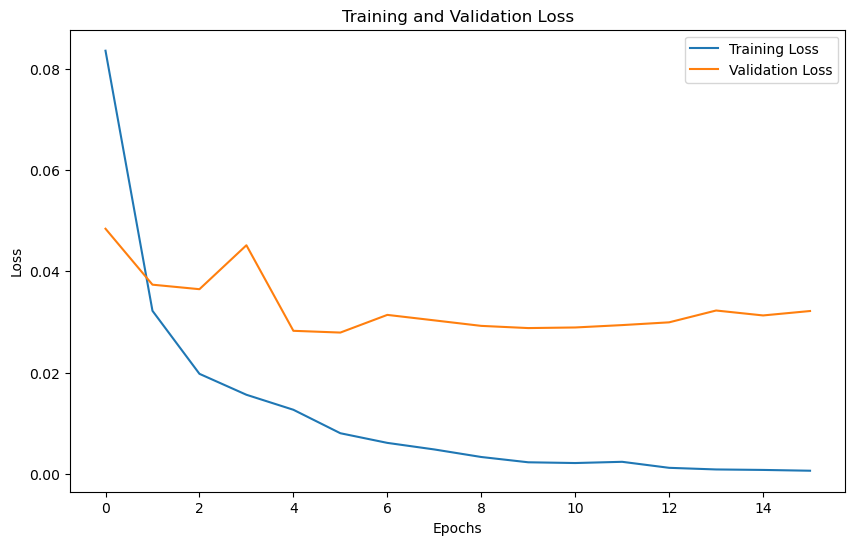

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

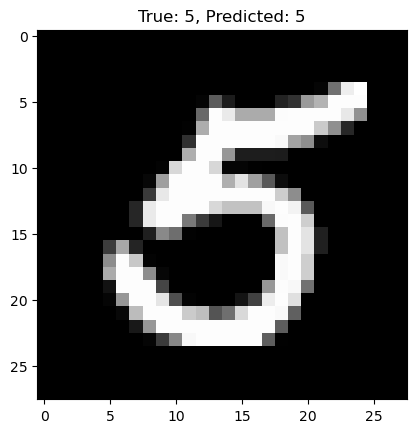

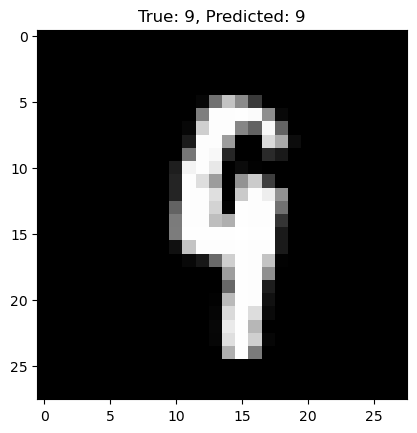

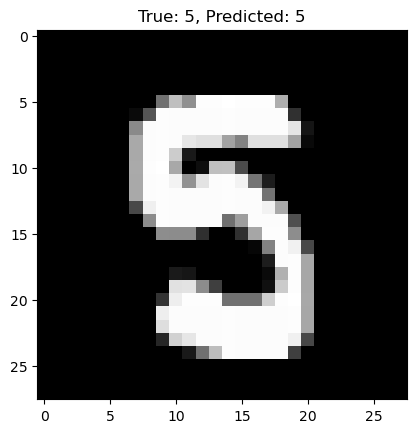

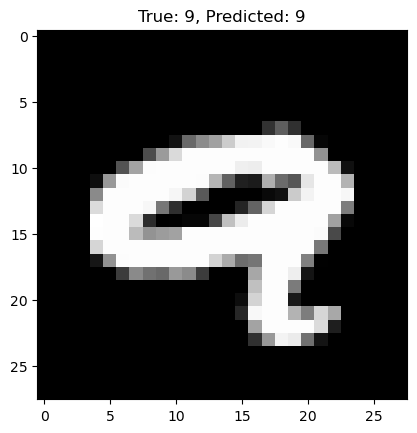

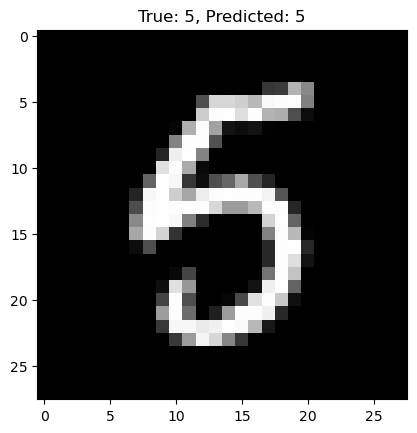

In [24]:
# Choose random test samples
random_samples = np.random.choice(len(x_test), 5)

for i in random_samples:
    sample_img = x_test[i]
    true_label = "9" if y_test[i] == 9 else "5"
    predicted_label = "9" if y_pred_binary[i] == 1 else "5"

    plt.imshow(sample_img, cmap='gray')
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.show()

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 100609 (393.00 KB)
Trainable params: 100609 (393.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
143/143 [==============================] - 1s 5ms/step - loss: 0.1229 - accuracy: 0.9687 - val_loss: 0.0540 - val_accuracy: 0.9850
Epoch 2/50
143/143 [==============================] - 1s 4ms/step - loss: 0.0371 - accuracy: 0.9883 - val_loss: 0.0434 - val_accuracy: 0.9886
Epoch 3/50
143/143 [==============================] - 1s 4ms/step - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0366 - val_accuracy: 0.9894
Epoch 4/50
143/143 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0337 - val_accuracy: 0.9899
Epoch 5/50
143/143 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9958 - val_loss: 0.0312 - val_accuracy: 0.9921
Epoch 6/50
143/143 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.0312 - val_accuracy: 0.9899
Epoch 7/50
143/143 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9977 - val_loss: 0.0312 - val_accuracy: 0.9916
Epoch 

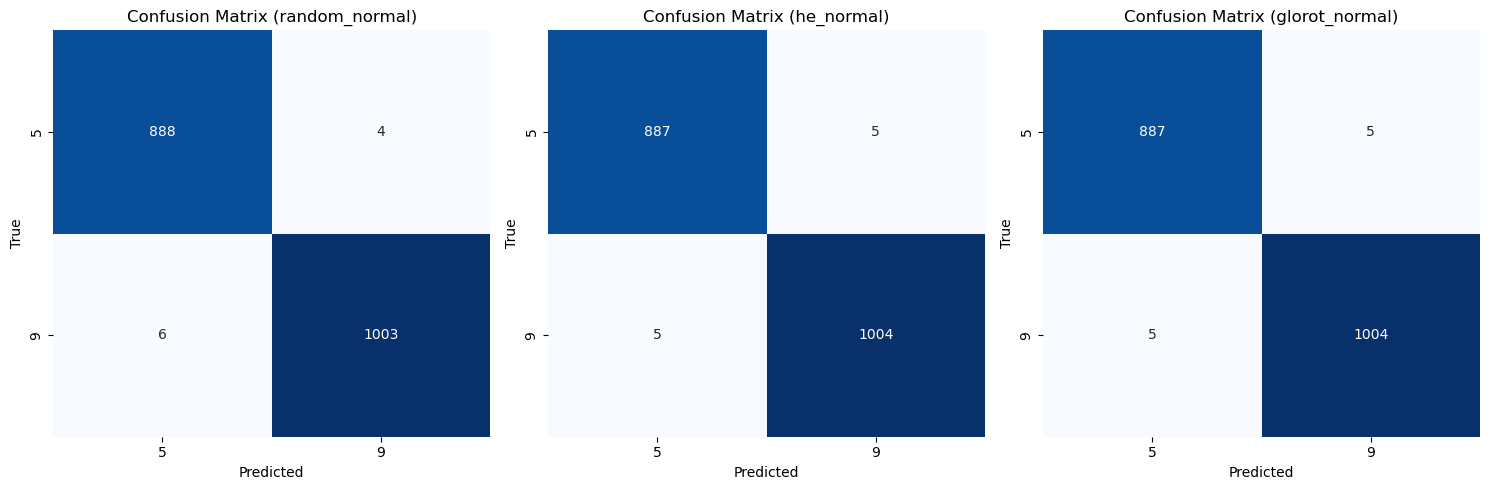

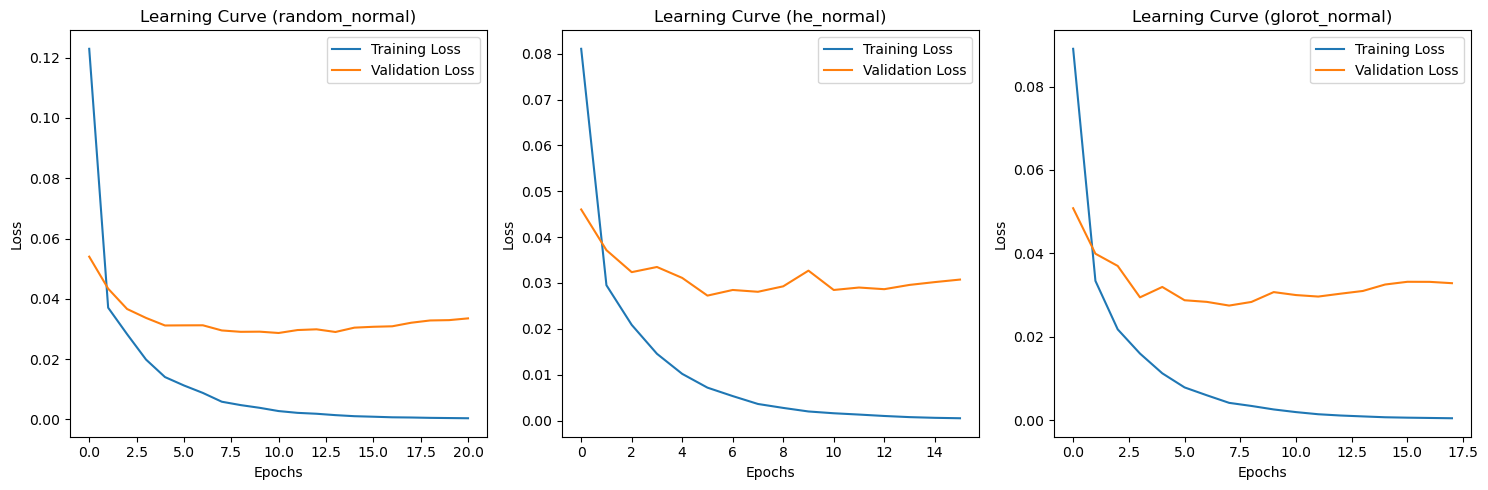

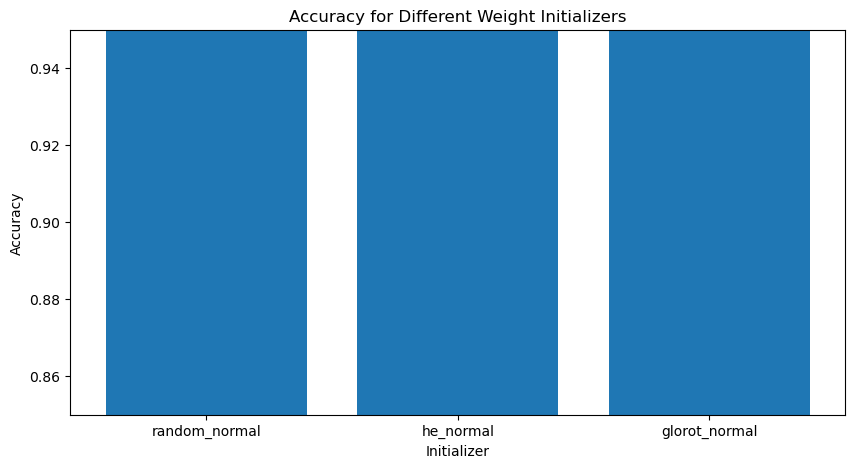

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Load and preprocess data (same as before)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_mask = np.isin(train_labels, [9, 5])
test_mask = np.isin(test_labels, [9, 5])
x_train, y_train = train_images[train_mask], train_labels[train_mask]
x_test, y_test = test_images[test_mask], test_labels[test_mask]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the weight initializers
initializers = ['random_normal', 'he_normal', 'glorot_normal']
confusion_matrices = []
learning_curves = []
accuracies = []

for initializer in initializers:
    # Build the model with different initializers
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_initializer=initializer),
        Dense(1, activation='sigmoid', kernel_initializer=initializer)
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(x_train, (y_train == 9).astype(int),
                        epochs=50,
                        batch_size=64,
                        validation_split=0.2,
                        callbacks=[early_stopping])

    # Evaluate the model
    y_pred = model.predict(x_test)
    y_pred_binary = (y_pred > 0.5).flatten()

    confusion = confusion_matrix((y_test == 9).astype(int), y_pred_binary)
    confusion_matrices.append(confusion)

    accuracy = accuracy_score((y_test == 9).astype(int), y_pred_binary)
    accuracies.append(accuracy)

    learning_curves.append(history.history)

# Plot confusion matrices
plt.figure(figsize=(15, 5))
for i, initializer in enumerate(initializers):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(confusion_matrices[i], annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["5", "9"], yticklabels=["5", "9"])
    plt.title(f"Confusion Matrix ({initializer})")
    plt.xlabel("Predicted")
    plt.ylabel("True")
plt.tight_layout()
plt.show()

# Plot learning curves
plt.figure(figsize=(15, 5))
for i, initializer in enumerate(initializers):
    plt.subplot(1, 3, i + 1)
    plt.plot(learning_curves[i]['loss'], label='Training Loss')
    plt.plot(learning_curves[i]['val_loss'], label='Validation Loss')
    plt.title(f'Learning Curve ({initializer})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.tight_layout()
plt.show()

# Plot accuracy using bar plots
plt.figure(figsize=(10, 5))
plt.bar(initializers, accuracies)
plt.title('Accuracy for Different Weight Initializers')
plt.xlabel('Initializer')
plt.ylabel('Accuracy')
plt.ylim(0.85, 0.95)
plt.show()


In [27]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 100609 (393.00 KB)
Trainable params: 100609 (393.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
750/750 [==============================] - 3s 3ms/step - loss: 0.3332 - accuracy: 0.9073 - val_loss: 0.1756 - val_accuracy: 0.9499
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 0.1536 - accuracy: 0.9552 - val_loss: 0.1408 - val_accuracy: 0.9588
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.1083 - accuracy: 0.9686 - val_loss: 0.1147 - val_accuracy: 0.9668
Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0825 - accuracy: 0.9761 - val_loss: 0.1038 - val_accuracy: 0.9697
Epoch 5/50
750/750 [==============================] - 3s 3ms/step - loss: 0.0644 - accuracy: 0.9812 - val_loss: 0.0925 - val_accuracy: 0.9722
Epoch 6/50
750/750 [==============================] - 3s 3ms/step - loss: 0.0534 - accuracy: 0.9840 - val_loss: 0.0915 - val_accuracy: 0.9732
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.0431 - accuracy: 0.9876 - val_loss: 0.0833 - val_accuracy: 0.9736
Epoch 

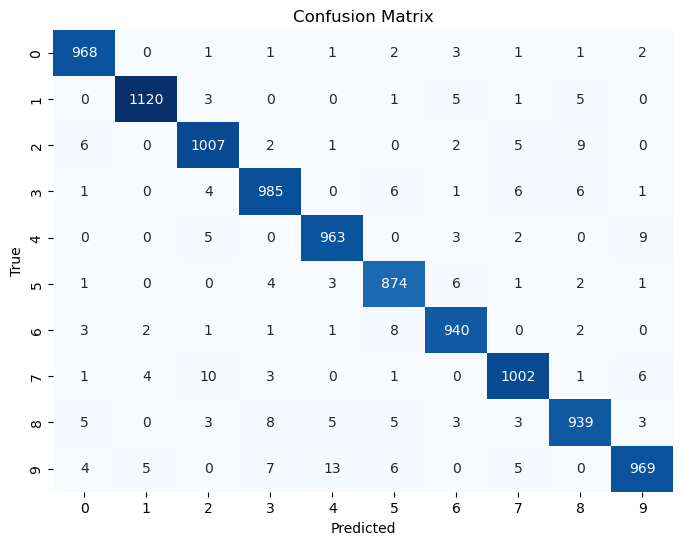


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
x_train, x_test = train_images / 255.0, test_images / 255.0

# Build the neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy for multi-class
              metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(x_train, train_labels, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluation on test data
test_loss, test_accuracy = model.evaluate(x_test, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

confusion = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification
print("\nClassification:")
print(classification_report(test_labels, y_pred_classes))

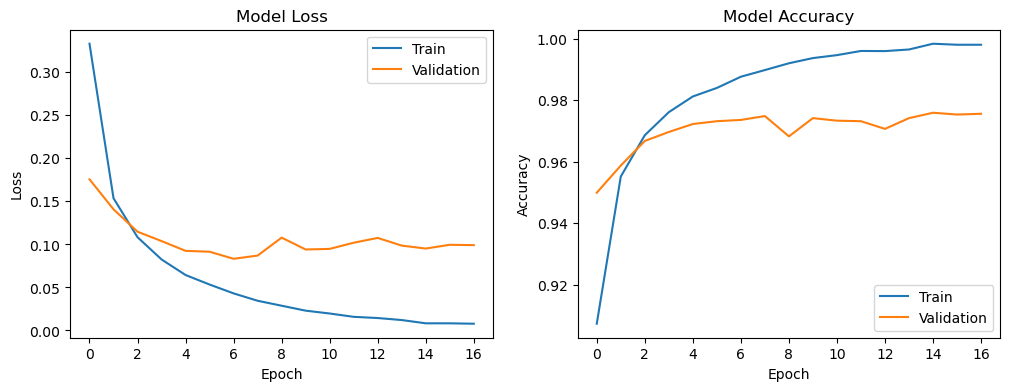

In [29]:
plt.figure(figsize=(12, 4))

# Training & validation loss value plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Training & validation accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [30]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Hyperparameters

Activation Function (Hidden Layer): ReLU

Activation Function (Output Layer): Softmax

Weight Initializer: Default (Random Initialization)

Number of Hidden Layers: 1

Neurons in Hidden Layer: 128

Loss Function: Sparse Categorical Cross-Entropy

Optimizer: Adam

Number of Epochs: 50

Batch Size: 64

Learning Rate: Default (Adaptive in Adam)

Evaluation Metric: Accuracy